## Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import mapclassify
import numpy as np

## Data Loading and Pre-processing

In [2]:
file_name =  "ERC_formatted.xlsx"

# loading DataFrames
pocet_obyvatelov = pd.read_excel(io=file_name, sheet_name=0)
narodeni = pd.read_excel(io=file_name, sheet_name=1)
zomreti = pd.read_excel(io=file_name, sheet_name=2)
vnutorna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=3)
vnutorna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=4)
zahranicna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=5)
zahranicna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=6)
priemerna_mzda = pd.read_excel(io=file_name, sheet_name=7)
zamestnanost = pd.read_excel(io=file_name, sheet_name=8)
pocet_gymnazii = pd.read_excel(io=file_name, sheet_name=9)
pocet_strednych_odbornych_skol = pd.read_excel(io=file_name, sheet_name=10)

# arrays of names and dataframes
dataframes = [pocet_obyvatelov, narodeni, zomreti, vnutorna_migracia_pristahovani, vnutorna_migracia_vystahovani, zahranicna_migracia_vystahovani, zahranicna_migracia_pristahovani, priemerna_mzda, zamestnanost, pocet_gymnazii, pocet_strednych_odbornych_skol]
names_of_datagrames = ["pocet_obyvatelov", "narodeni", "zomreti", "vnutorna_migracia_pristahovani", "vnutorna_migracia_vystahovani", "zahranicna_migracia_vystahovani", "zahranicna_migracia_pristahovani", "priemerna_mzda", "zamestnanost", "pocet_gymnazii", "pocet_strednych_odbornych_skol"]

# creating dictionary of dataframes for each year from 2010 to 2021
years = {}
for year in range(2010,2022):
    years[year] = pd.DataFrame(pocet_obyvatelov["Okres"])
    for i in range(len(dataframes)):
        years[year][names_of_datagrames[i]] = dataframes[i][year]


## MISC commands (debug tools)

In [3]:
# MISC getting row of Okres Bratislava I
# print(years[2010][years[2010]["Okres"] == "Okres Bratislava I"])

In [4]:
# # plotting correlation heatmap for every year
# for year in range(2010,2022):
#     correlation_matrix_data = years[year]
    
#     mask = np.triu(np.ones_like(correlation_matrix_data.corr(), dtype=bool))
#     # print(correlation_matrix_data.corr())
#     dataplot=sb.heatmap(correlation_matrix_data.corr(), annot=True, cmap="YlGnBu", mask = mask)

#     # displaying heatmaps
#     plt.show()

In [5]:
# from scipy.optimize import curve_fit

# # this is the function we want to fit
# def func(x, a, c):
#     return a*x*x + c

# p_opt, p_cov = curve_fit(func, years[YEAR][X], years[YEAR][Y])

# print(p_opt)
# a, c = p_opt
# sb.scatterplot(data=years[YEAR], x=X, y=Y) # hue="Okres"
# sb.lmplot(data=years[YEAR], x=X, y=Y, line_kws={'color': 'red'})
# plt.plot(years[YEAR][X], func(years[YEAR][X], a, c), 'g--', label='fit: a=%5.3f, c=%5.3f' % tuple(p_opt))


## Average correlation heatmap

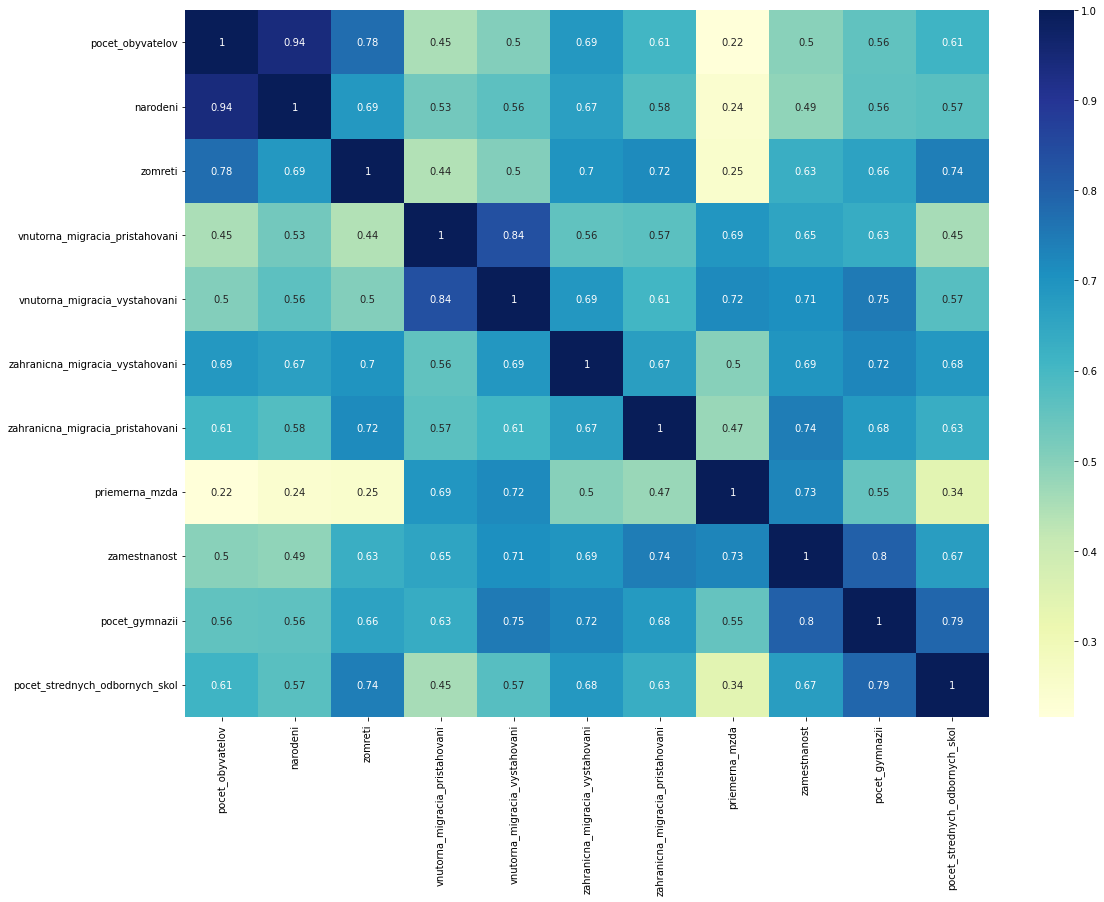

In [6]:
# sb.set(font_scale=2)
sum_of_correlations = years[2010].corr()

for year in range(2011,2022):
    sum_of_correlations += years[year].corr()

sum_of_correlations = sum_of_correlations / 12

fig, ax = plt.subplots(figsize=(18,13)) 

mask = np.triu(np.ones_like(years[2010].corr(), dtype=bool))
dataplot=sb.heatmap(sum_of_correlations, annot=True, cmap="YlGnBu", ax = ax)
# plt.savefig("map.png", transparent=True )


## Specific correlation plots

In [118]:
# function for setting the DPI of the plots
def set_DPI():
    fig, ax = plt.subplots()
    fig.set_dpi(100)

# "pocet_obyvatelov", "narodeni", "zomreti", "vnutorna_migracia_pristahovani", "vnutorna_migracia_vystahovani",
# "zahranicna_migracia_vystahovani", "zahranicna_migracia_pristahovani", "priemerna_mzda", "zamestnanost", "pocet_gymnazii", "pocet_strednych_odbornych_skol"

## Trh prace

In [155]:
# Zamestnanost a priemerna mzda zavislost
YEAR = 2012
year = years[YEAR]
X = year["zamestnanost"] / year["pocet_obyvatelov"] * 100
Y = year["priemerna_mzda"]

# # Migracia a zamestnanost zavislost 
# X = year["zahranicna_migracia_pristahovani"] / year["pocet_obyvatelov"] * 100
# Y = year["zamestnanost"] / year["pocet_obyvatelov"] * 100

Correlation coefficient:  0.6018195422230863


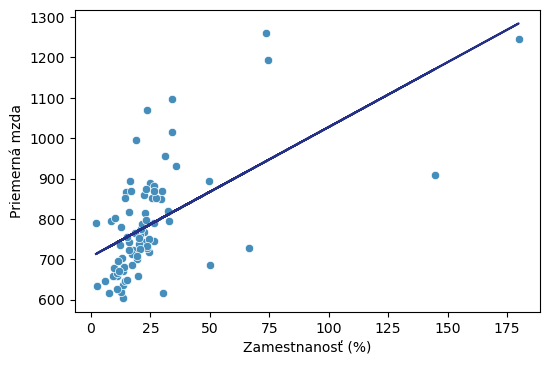

In [156]:
# SIMPLE PLOT OF X AND Y
set_DPI()
fig = sb.scatterplot(x=X, y=Y, color="#458EBC") # hue=year["pocet_gymnazii"]/year["pocet_obyvatelov"]

fig.set_xlabel('Zamestnanosť (%)')
fig.set_ylabel('Priemerná mzda')

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, color="#243187")

# correltion coefficient of X and Y
plt.savefig("priemerna_mzda_zamestnanost.png", transparent=True, dpi=300)
print("Correlation coefficient: ", X.corr(Y))
# print()
# summ = 0
# for i in range(2010,2022):
#     one = years[i]["zamestnanost"] / years[i]["pocet_obyvatelov"] * 100
#     two = years[i]["priemerna_mzda"]
#     print(i, ": ", one.corr(two))
#     summ += one.corr(two)
# print("Average: ", summ/12)



Correlation coefficient:  0.5287021427830249


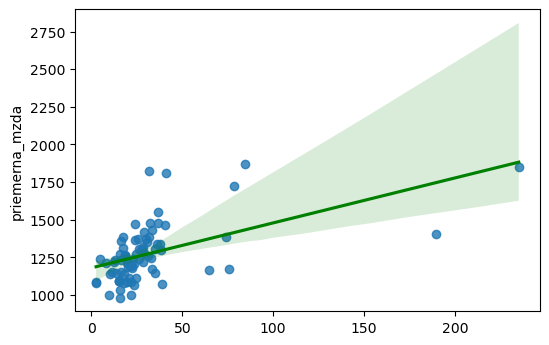

In [120]:
# LINEAR REGRESSION FITED TO PLOT OF X AND Y
set_DPI()
sb.regplot(x=X, y=Y, line_kws={'color': 'green'}) # hue="Okres"

## Populacia

## Vzdelanie

In [ ]:
# X = year["zamestnanost"] / year["pocet_obyvatelov"] * 100
# Y = year["pocet_gymnazii"] /year["pocet_obyvatelov"]

## Heatmap of Slovak districts

,REF,TXT,geometry
0,SK0321,okres Banská Bystrica,"POLYGON ((18.99112 48.80609, 18.99221 48.81087..."
1,SK0322,okres Banská Štiavnica,"POLYGON ((18.75064 48.41116, 18.75472 48.41284..."
2,SK0411,okres Bardejov,"POLYGON ((20.98654 49.30662, 20.98736 49.30825..."
3,SK0101,okres Bratislava I,"POLYGON ((17.07345 48.17451, 17.07748 48.17197..."
4,SK0102,okres Bratislava II,"POLYGON ((17.11736 48.13825, 17.11749 48.13996..."


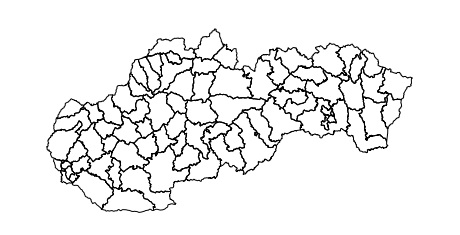

In [11]:
map = gpd.read_file("okresy.json")
geoplot.polyplot(map, projection=gcrs.AlbersEqualArea())

# sort values by TXT column A to Z and reset index
map = map.sort_values(by=['TXT']) 
map = map.reset_index(drop=True)

map.head()

In [12]:
# sort by name A to Z of Okres
for year in range(2010,2022):
    years[year] = years[year].sort_values(by=['Okres'])  
    years[year] = years[year].reset_index(drop=True)
map['heatmap'] = years[2021]["pocet_obyvatelov"]
# years[2021].head(10)
map.sort_values(by=['heatmap'], ascending=False)

,REF,TXT,geometry,heatmap
47,SK0417,okres Prešov,"POLYGON ((20.87052 49.00690, 20.87404 49.01081...",172804
37,SK0233,okres Nitra,"POLYGON ((17.83337 48.29675, 17.83295 48.29757...",164788
78,SK031B,okres Žilina,"POLYGON ((18.46496 48.95636, 18.47433 48.95717...",161377
39,SK0234,okres Nové Zámky,"POLYGON ((17.96102 48.13147, 18.00117 48.16595...",138168
67,SK0217,okres Trnava,"POLYGON ((17.31431 48.45597, 17.30394 48.46336...",131894
...,...,...,...,...
44,SK0327,okres Poltár,"POLYGON ((19.58047 48.53711, 19.58423 48.53807...",20634
62,SK041B,okres Stropkov,"POLYGON ((21.56942 49.15917, 21.56970 49.16067...",19878
68,SK0319,okres Turčianske Teplice,"POLYGON ((18.69381 48.90960, 18.69319 48.91178...",15956
1,SK0322,okres Banská Štiavnica,"POLYGON ((18.75064 48.41116, 18.75472 48.41284...",15649


In [68]:
# sort by name A to Z of Okres
for year in range(2010,2022):
    years[year] = years[year].sort_values(by=['Okres'])  
    years[year] = years[year].reset_index(drop=True)
map['heatmap'] = years[2021]["priemerna_mzda"]
# years[2021].head(10)
map.sort_values(by=['heatmap'], ascending=False)

,REF,TXT,geometry,heatmap
4,SK0102,okres Bratislava II,"POLYGON ((17.11736 48.13825, 17.11749 48.13996...",1870
3,SK0101,okres Bratislava I,"POLYGON ((17.07345 48.17451, 17.07748 48.17197...",1851
7,SK0105,okres Bratislava V,"POLYGON ((17.05736 48.14179, 17.06296 48.14227...",1825
6,SK0104,okres Bratislava IV,"POLYGON ((16.95726 48.26348, 16.95783 48.26336...",1811
5,SK0103,okres Bratislava III,"POLYGON ((17.06441 48.17854, 17.06747 48.18183...",1724
...,...,...,...,...
62,SK041B,okres Stropkov,"POLYGON ((21.56942 49.15917, 21.56970 49.16067...",1066
15,SK0421,okres Gelnica,"POLYGON ((20.53360 48.79417, 20.53077 48.79751...",1030
2,SK0411,okres Bardejov,"POLYGON ((20.98654 49.30662, 20.98736 49.30825...",1000
51,SK0329,okres Rimavská Sobota,"POLYGON ((19.72801 48.66051, 19.72846 48.66212...",997


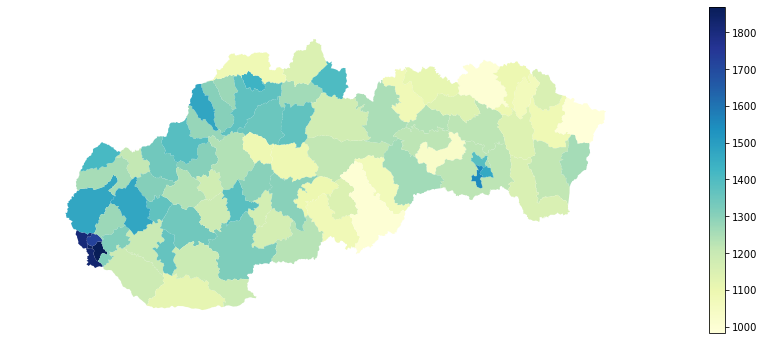

In [81]:
heatmap_data = map["heatmap"]
# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap='YlGnBu', figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)




# MAPS FEATURE ENGINEERING TO DO
plt.savefig("map-mzda-21.png", transparent=True )

## Histograms

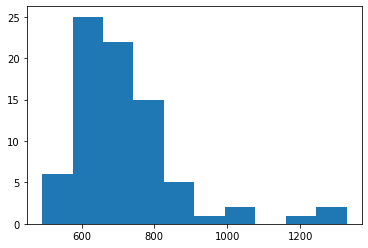

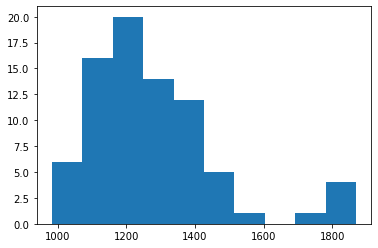

In [76]:
plt.hist(years[2010]["priemerna_mzda"])
plt.show()
plt.hist(years[2021]["priemerna_mzda"])
plt.show()